### Lab Assignment - Final
### CB.EN.U4CSE20138

## A. Data Manipulation-Pandas
## Dataset - Birthrate data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [3]:
df

year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]

### Indexing

In [4]:
index = [i for i in range(1,15548)]
df1 = pd.DataFrame(df,index=index)

In [5]:
df1

year  month  day gender    births
1      1969.0    1.0  1.0      M    4440.0
2      1969.0    1.0  2.0      F    4454.0
3      1969.0    1.0  2.0      M    4548.0
4      1969.0    1.0  3.0      F    4548.0
5      1969.0    1.0  3.0      M    4994.0
...       ...    ...  ...    ...       ...
15543  2008.0   11.0  NaN      F  158939.0
15544  2008.0   11.0  NaN      M  165468.0
15545  2008.0   12.0  NaN      F  173215.0
15546  2008.0   12.0  NaN      M  181235.0
15547     NaN    NaN  NaN    NaN       NaN

[15547 rows x 5 columns]

### Missing values

In [6]:
df1.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [7]:
for i in df1.columns:
    print(df1[i].isnull().sum())

1
1
481
1
1


In [8]:
for i in df1.columns:
    if i!='gender':
        df1[i].fillna(np.mean(df1[i]),inplace=True)

In [9]:
df1.isna().sum()

year      0
month     0
day       0
gender    1
births    0
dtype: int64

In [10]:
x = df1['gender'].mode()
df1['gender'].fillna(x[0],inplace=True)


In [11]:
df1.isna().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

### concat

In [12]:
grid = [[1,2,3],[4,5,6]]
print(len(grid[0]))

3


In [13]:
import math
l = len(df1)
l=math.ceil(l/2)
df3 = df1[:l]
df4 = df1[l:]
df5 = pd.concat([df3,df4])
df5

year      month        day gender         births
1      1969.000000   1.000000   1.000000      M    4440.000000
2      1969.000000   1.000000   2.000000      F    4454.000000
3      1969.000000   1.000000   2.000000      M    4548.000000
4      1969.000000   1.000000   3.000000      F    4548.000000
5      1969.000000   1.000000   3.000000      M    4994.000000
...            ...        ...        ...    ...            ...
15543  2008.000000  11.000000  17.771008      F  158939.000000
15544  2008.000000  11.000000  17.771008      M  165468.000000
15545  2008.000000  12.000000  17.771008      F  173215.000000
15546  2008.000000  12.000000  17.771008      M  181235.000000
15547  1979.038081   6.516274  17.771008      F    9762.661263

[15547 rows x 5 columns]

### Append

In [14]:
df6 = df3.append(df4)
df6

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\565437931.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df3.append(df4)


year      month        day gender         births
1      1969.000000   1.000000   1.000000      M    4440.000000
2      1969.000000   1.000000   2.000000      F    4454.000000
3      1969.000000   1.000000   2.000000      M    4548.000000
4      1969.000000   1.000000   3.000000      F    4548.000000
5      1969.000000   1.000000   3.000000      M    4994.000000
...            ...        ...        ...    ...            ...
15543  2008.000000  11.000000  17.771008      F  158939.000000
15544  2008.000000  11.000000  17.771008      M  165468.000000
15545  2008.000000  12.000000  17.771008      F  173215.000000
15546  2008.000000  12.000000  17.771008      M  181235.000000
15547  1979.038081   6.516274  17.771008      F    9762.661263

[15547 rows x 5 columns]

### merge and join

In [15]:
df7 = pd.merge(df3,df4,how='inner')
df7

Empty DataFrame
Columns: [year, month, day, gender, births]
Index: []

In [16]:
print(pd.concat((df1.iloc[:,0:3],df1.iloc[:,2:5]),join="inner").head())

   day
1  1.0
2  2.0
3  2.0
4  3.0
5  3.0


In [17]:
print("Concatenated result (using Outer Join) :")
print(pd.concat((df1,df1.iloc[:,0:3]),join="outer").head())

Concatenated result (using Outer Join) :
     year  month  day gender  births
1  1969.0    1.0  1.0      M  4440.0
2  1969.0    1.0  2.0      F  4454.0
3  1969.0    1.0  2.0      M  4548.0
4  1969.0    1.0  3.0      F  4548.0
5  1969.0    1.0  3.0      M  4994.0


### Aggregation

In [18]:
df1.sum()

year                                        30768105.038081
month                                         101308.516274
day                                            276285.85464
gender    MFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMFMF...
births                                     151780094.661263
dtype: object

In [19]:
df1.mean()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


year      1979.038081
month        6.516274
day         17.771008
births    9762.661263
dtype: float64

In [20]:
df1.min()

year      1969.0
month        1.0
day          1.0
gender         F
births       1.0
dtype: object

In [21]:
df1.max()

year        2008.0
month         12.0
day           99.0
gender           M
births    199622.0
dtype: object

In [22]:
df1.median()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\2279417019.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


year      1979.0
month        7.0
day         17.0
births    4814.0
dtype: float64

In [23]:
df1.std()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\3039516898.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


year          6.727859
month         3.449348
day          15.045627
births    28552.429000
dtype: float64

In [24]:
df1.prod()

D:\Application\Anaconda\lib\site-packages\numpy\core\_methods.py:52: RuntimeWarning: overflow encountered in reduce
  return umr_prod(a, axis, dtype, out, keepdims, initial, where)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\1211784430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.prod()


year      inf
month     inf
day       inf
births    inf
dtype: float64

In [25]:
df1.mad()

year         5.452924
month        2.995740
day          9.204946
births    9853.394172
dtype: float64

### Transform

In [26]:
df8 = df1.groupby('year').transform(lambda x: x - x.mean())
df8


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\1067088748.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df8 = df1.groupby('year').transform(lambda x: x - x.mean())


month        day        births
1     -5.507171 -17.616688   -248.604954
2     -5.507171 -16.616688   -234.604954
3     -5.507171 -16.616688   -140.604954
4     -5.507171 -15.616688   -140.604954
5     -5.507171 -15.616688    305.395046
...         ...        ...           ...
15543  4.500000   0.000000 -18359.166667
15544  4.500000   0.000000 -11830.166667
15545  5.500000   0.000000  -4083.166667
15546  5.500000   0.000000   3936.833333
15547  0.000000   0.000000      0.000000

[15547 rows x 3 columns]

In [27]:
def norm_by_data2(x):
 # x is a DataFrame of group values
 x['month'].mean()
 return x
print(df1); 
print(df1.groupby('month').apply(norm_by_data2))
df1.groupby('month').apply(norm_by_data2)

              year      month        day gender         births
1      1969.000000   1.000000   1.000000      M    4440.000000
2      1969.000000   1.000000   2.000000      F    4454.000000
3      1969.000000   1.000000   2.000000      M    4548.000000
4      1969.000000   1.000000   3.000000      F    4548.000000
5      1969.000000   1.000000   3.000000      M    4994.000000
...            ...        ...        ...    ...            ...
15543  2008.000000  11.000000  17.771008      F  158939.000000
15544  2008.000000  11.000000  17.771008      M  165468.000000
15545  2008.000000  12.000000  17.771008      F  173215.000000
15546  2008.000000  12.000000  17.771008      M  181235.000000
15547  1979.038081   6.516274  17.771008      F    9762.661263

[15547 rows x 5 columns]
              year      month        day gender         births
1      1969.000000   1.000000   1.000000      M    4440.000000
2      1969.000000   1.000000   2.000000      F    4454.000000
3      1969.000000   1.000000

year      month        day gender         births
1      1969.000000   1.000000   1.000000      M    4440.000000
2      1969.000000   1.000000   2.000000      F    4454.000000
3      1969.000000   1.000000   2.000000      M    4548.000000
4      1969.000000   1.000000   3.000000      F    4548.000000
5      1969.000000   1.000000   3.000000      M    4994.000000
...            ...        ...        ...    ...            ...
15543  2008.000000  11.000000  17.771008      F  158939.000000
15544  2008.000000  11.000000  17.771008      M  165468.000000
15545  2008.000000  12.000000  17.771008      F  173215.000000
15546  2008.000000  12.000000  17.771008      M  181235.000000
15547  1979.038081   6.516274  17.771008      F    9762.661263

[15547 rows x 5 columns]

### Pivot table

In [28]:
df1.pivot_table(index='gender')

births        day     month         year
gender                                                
F        9521.802940  17.784698  6.514084  1979.038714
M       10003.674559  17.757308  6.518466  1979.037447

## B. Time Series 

In [29]:
ts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)

In [30]:
ts

Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2012-10-03 00:00:00                  13.0                           4.0   
2012-10-03 01:00:00                  10.0                           4.0   
2012-10-03 02:00:00                   2.0                           1.0   
2012-10-03 03:00:00                   5.0                           2.0   
2012-10-03 04:00:00                   7.0                           6.0   
...                                   ...                           ...   
2022-09-30 19:00:00                 168.0                          57.0   
2022-09-30 20:00:00                  73.0                          33.0   
2022-09-30 21:00:00                  69.0                          30.0   
2022-09-30 22:00:00                  51.0                          10.0   
2022-09-30 23:00:00                  59.0                          22.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2012-10-03 00:00:00                           9.0  
2012-10-03 01:00:00                           6.0  
2012-10-03 02:00:00                           1.0  
2012-10-03 03:00:00                           3.0  
2012-10-03 04:00:00                           1.0  
...                                           ...  
2022-09-30 19:00:00                         111.0  
2022-09-30 20:00:00                          40.0  
2022-09-30 21:00:00                          39.0  
2022-09-30 22:00:00                          41.0  
2022-09-30 23:00:00                          37.0  

[87600 rows x 3 columns]

In [31]:
ts.columns = ['Total','West', 'East']

In [32]:
ts

Total  West   East
Date                                   
2012-10-03 00:00:00   13.0   4.0    9.0
2012-10-03 01:00:00   10.0   4.0    6.0
2012-10-03 02:00:00    2.0   1.0    1.0
2012-10-03 03:00:00    5.0   2.0    3.0
2012-10-03 04:00:00    7.0   6.0    1.0
...                    ...   ...    ...
2022-09-30 19:00:00  168.0  57.0  111.0
2022-09-30 20:00:00   73.0  33.0   40.0
2022-09-30 21:00:00   69.0  30.0   39.0
2022-09-30 22:00:00   51.0  10.0   41.0
2022-09-30 23:00:00   59.0  22.0   37.0

[87600 rows x 3 columns]

In [33]:
ts.dropna().describe()

Total          West          East
count  87586.000000  87586.000000  87586.000000
mean     107.240849     48.086623     59.154226
std      134.790561     61.573965     83.567491
min        0.000000      0.000000      0.000000
25%       13.000000      6.000000      7.000000
50%       60.000000     27.000000     30.000000
75%      144.000000     66.000000     75.000000
max     1097.000000    698.000000    850.000000

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(20, 10)})
#plt.figure(figsize=(20,20))
ts.plot()
plt.ylabel('Hourly Bicycle Count')

Text(0, 0.5, 'Hourly Bicycle Count')

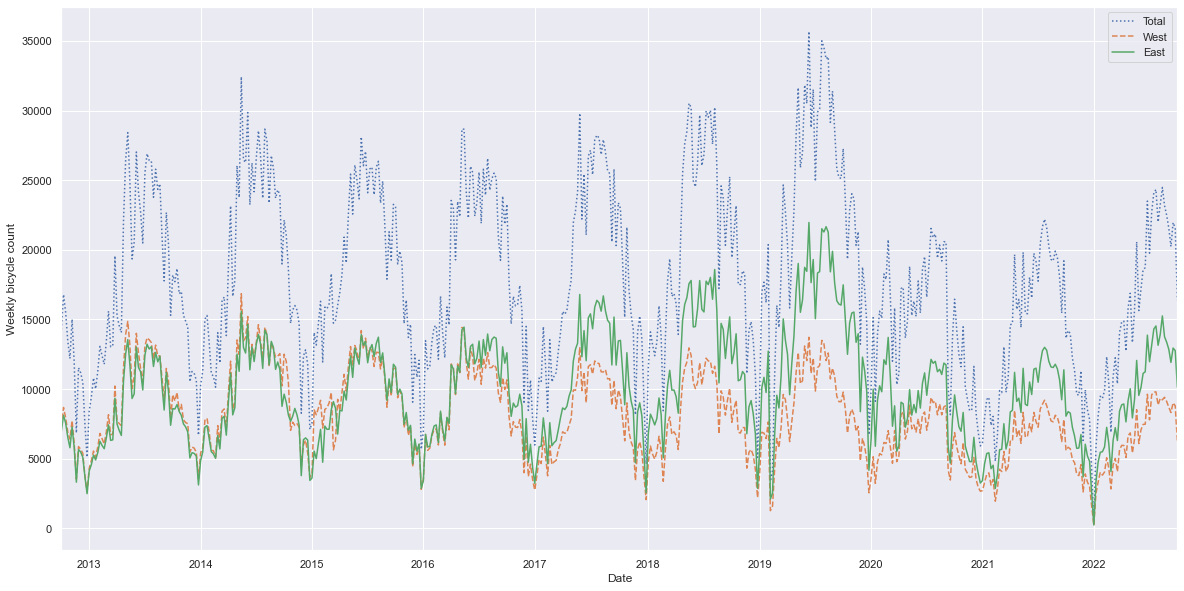

In [35]:
weekly = ts.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');


Text(0, 0.5, 'mean hourly count')

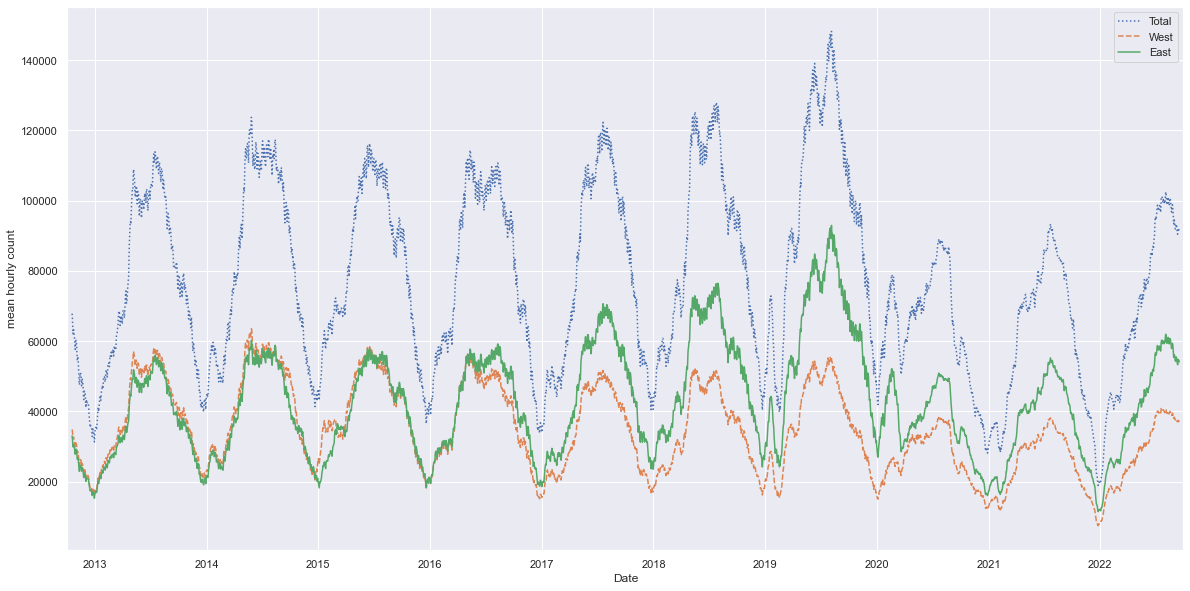

In [36]:
daily = ts.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')

In [37]:
daily.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'])


<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='time'>

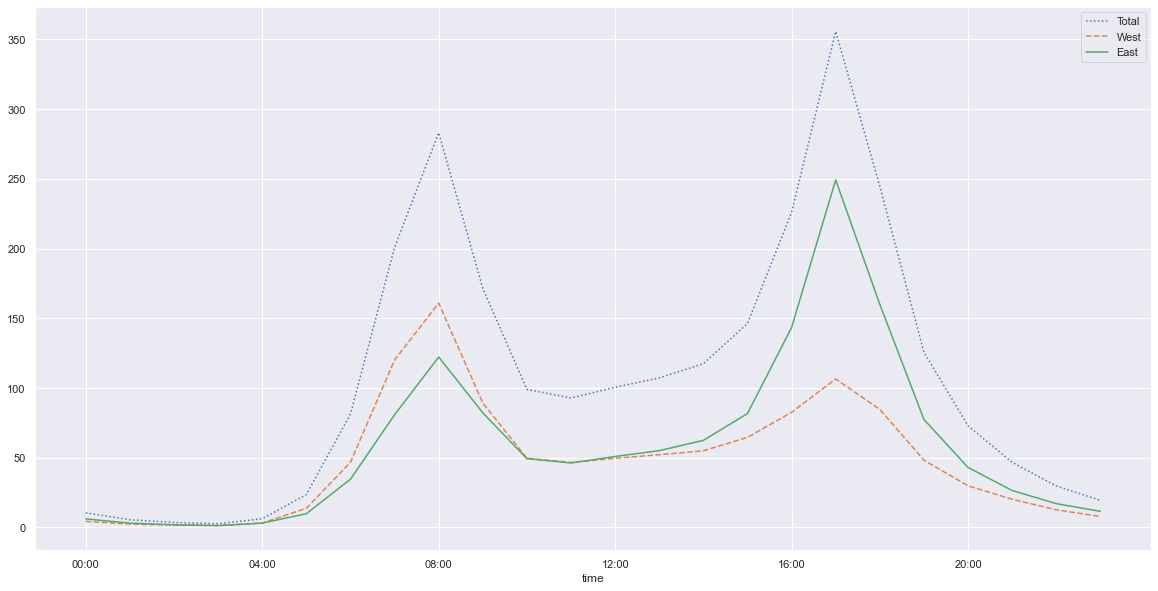

In [38]:
by_time = ts.groupby(ts.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

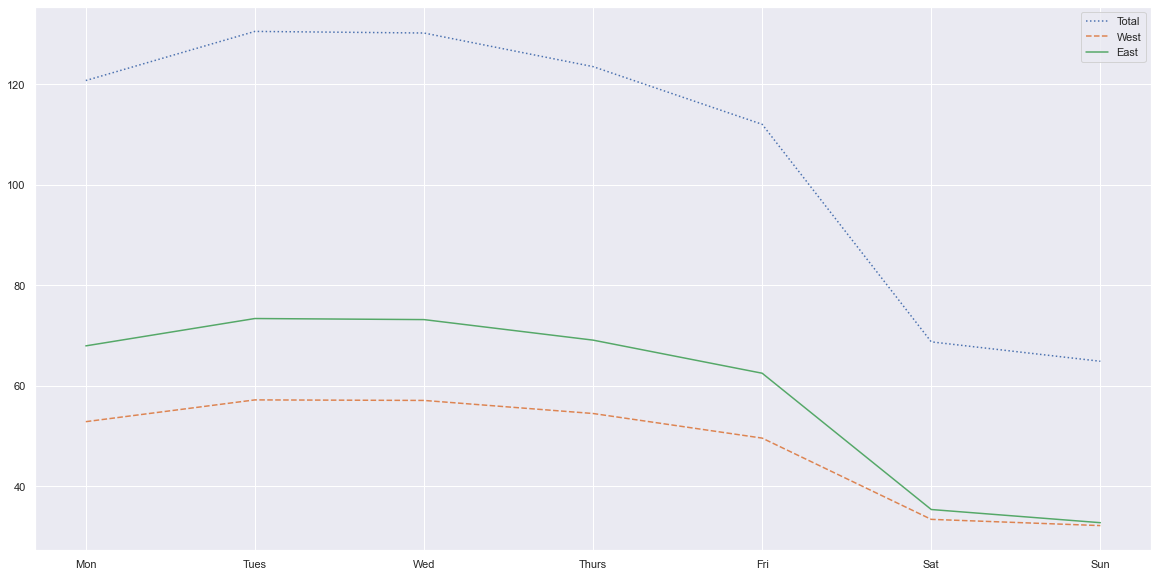

In [39]:
by_weekday = ts.groupby(ts.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);


In [40]:
weekend = np.where(ts.index.weekday < 5, 'Weekday', 'Weekend')
by_time = ts.groupby([weekend, ts.index.time]).mean()
# weekday = np.where(ts.index.weekday >= 5, 'Weekday', 'Weekend')
# by_time = ts.groupby([weekday, ts.index.time]).mean()


### Time shifts

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18064\3600603100.py:5: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ts.tshift(300).plot(ax=ax[2])


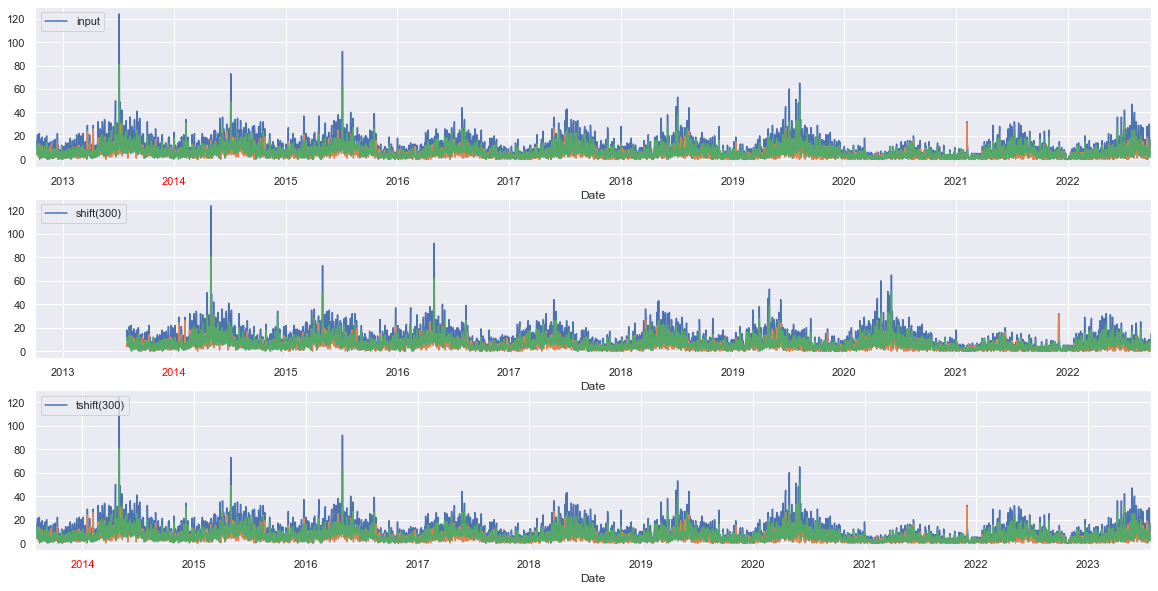

In [41]:
fig, ax = plt.subplots(3, sharey=True)
ts = ts.asfreq('D', method='pad')
ts.plot(ax=ax[0])
ts.shift(300).plot(ax=ax[1])
ts.tshift(300).plot(ax=ax[2])
local_max = pd.to_datetime('2006-10-03')
offset = pd.Timedelta(300, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(300)'], loc=2)
ax[1].get_xticklabels()[2].set(color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(300)'], loc=2)
ax[2].get_xticklabels()[1].set( color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

### Q3 - Stocks dataset

In [42]:
sd=pd.read_csv("stock_px_2.csv")

In [43]:
sd

Unnamed: 0    AAPL   MSFT    XOM      SPX
0     2003-01-02 00:00:00    7.40  21.11  29.22   909.03
1     2003-01-03 00:00:00    7.45  21.14  29.24   908.59
2     2003-01-06 00:00:00    7.45  21.52  29.96   929.01
3     2003-01-07 00:00:00    7.43  21.93  28.95   922.93
4     2003-01-08 00:00:00    7.28  21.31  28.83   909.93
...                   ...     ...    ...    ...      ...
2209  2011-10-10 00:00:00  388.81  26.94  76.28  1194.89
2210  2011-10-11 00:00:00  400.29  27.00  76.27  1195.54
2211  2011-10-12 00:00:00  402.19  26.96  77.16  1207.25
2212  2011-10-13 00:00:00  408.43  27.18  76.37  1203.66
2213  2011-10-14 00:00:00  422.00  27.27  78.11  1224.58

[2214 rows x 5 columns]

In [44]:
sd.set_index("Unnamed: 0",inplace=True)
sd

AAPL   MSFT    XOM      SPX
Unnamed: 0                                        
2003-01-02 00:00:00    7.40  21.11  29.22   909.03
2003-01-03 00:00:00    7.45  21.14  29.24   908.59
2003-01-06 00:00:00    7.45  21.52  29.96   929.01
2003-01-07 00:00:00    7.43  21.93  28.95   922.93
2003-01-08 00:00:00    7.28  21.31  28.83   909.93
...                     ...    ...    ...      ...
2011-10-10 00:00:00  388.81  26.94  76.28  1194.89
2011-10-11 00:00:00  400.29  27.00  76.27  1195.54
2011-10-12 00:00:00  402.19  26.96  77.16  1207.25
2011-10-13 00:00:00  408.43  27.18  76.37  1203.66
2011-10-14 00:00:00  422.00  27.27  78.11  1224.58

[2214 rows x 4 columns]

### Indexing, selecting and subsetting

In [45]:
#by columns
sd.loc[:,['XOM']]

XOM
Unnamed: 0                
2003-01-02 00:00:00  29.22
2003-01-03 00:00:00  29.24
2003-01-06 00:00:00  29.96
2003-01-07 00:00:00  28.95
2003-01-08 00:00:00  28.83
...                    ...
2011-10-10 00:00:00  76.28
2011-10-11 00:00:00  76.27
2011-10-12 00:00:00  77.16
2011-10-13 00:00:00  76.37
2011-10-14 00:00:00  78.11

[2214 rows x 1 columns]

In [46]:
sd.loc[:,['AAPL']]

AAPL
Unnamed: 0                 
2003-01-02 00:00:00    7.40
2003-01-03 00:00:00    7.45
2003-01-06 00:00:00    7.45
2003-01-07 00:00:00    7.43
2003-01-08 00:00:00    7.28
...                     ...
2011-10-10 00:00:00  388.81
2011-10-11 00:00:00  400.29
2011-10-12 00:00:00  402.19
2011-10-13 00:00:00  408.43
2011-10-14 00:00:00  422.00

[2214 rows x 1 columns]

In [47]:
#selection example
sd['AAPL'][sd['AAPL']>100]

Unnamed: 0
2007-05-02 00:00:00    100.39
2007-05-03 00:00:00    100.40
2007-05-04 00:00:00    100.81
2007-05-07 00:00:00    103.92
2007-05-08 00:00:00    105.06
                        ...  
2011-10-10 00:00:00    388.81
2011-10-11 00:00:00    400.29
2011-10-12 00:00:00    402.19
2011-10-13 00:00:00    408.43
2011-10-14 00:00:00    422.00
Name: AAPL, Length: 1023, dtype: float64

In [48]:
sd['Sum']=sd['AAPL']+sd['SPX']+sd['MSFT']+sd['XOM']
sd

AAPL   MSFT    XOM      SPX      Sum
Unnamed: 0                                                 
2003-01-02 00:00:00    7.40  21.11  29.22   909.03   966.76
2003-01-03 00:00:00    7.45  21.14  29.24   908.59   966.42
2003-01-06 00:00:00    7.45  21.52  29.96   929.01   987.94
2003-01-07 00:00:00    7.43  21.93  28.95   922.93   981.24
2003-01-08 00:00:00    7.28  21.31  28.83   909.93   967.35
...                     ...    ...    ...      ...      ...
2011-10-10 00:00:00  388.81  26.94  76.28  1194.89  1686.92
2011-10-11 00:00:00  400.29  27.00  76.27  1195.54  1699.10
2011-10-12 00:00:00  402.19  26.96  77.16  1207.25  1713.56
2011-10-13 00:00:00  408.43  27.18  76.37  1203.66  1715.64
2011-10-14 00:00:00  422.00  27.27  78.11  1224.58  1751.96

[2214 rows x 5 columns]

In [49]:
sd.iloc[:,4].plot(figsize=(12,8),color='red')
plt.xlabel('Price')
plt.ylabel('Year')

Text(0, 0.5, 'Year')

Text(0, 0.5, 'stock price')

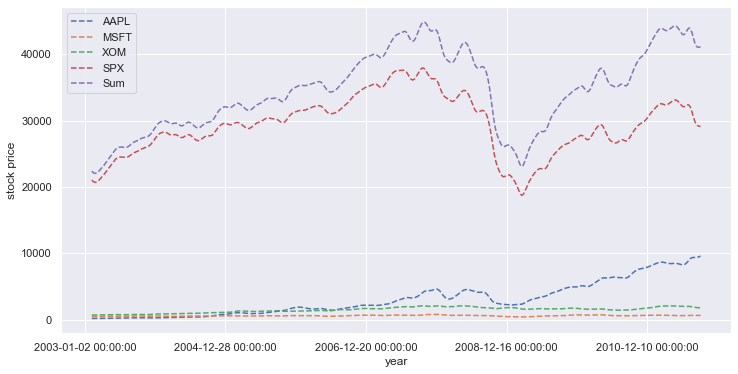

In [50]:
sd.rolling(50, center=True,win_type='gaussian').sum(std=10).plot(style= '--',figsize=(12,6));
plt.xlabel("year")
plt.ylabel("stock price")

 ### Date Ranges, Frequencies, and Shifting (Leading and Lagging) Data

In [51]:
from datetime import datetime
now = datetime.now().time() 
print("now =", now)

now = 19:09:09.712081


In [52]:
stock=sd

In [53]:
import datetime
datetime.datetime.combine(datetime.date(2011, 1, 1), datetime.time(10, 23))

datetime.datetime(2011, 1, 1, 10, 23)

In [54]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [55]:
shift1=stock.shift(1, axis = 1)
shift1.head()

AAPL  MSFT    XOM    SPX     Sum
Unnamed: 0                                           
2003-01-02 00:00:00   NaN  7.40  21.11  29.22  909.03
2003-01-03 00:00:00   NaN  7.45  21.14  29.24  908.59
2003-01-06 00:00:00   NaN  7.45  21.52  29.96  929.01
2003-01-07 00:00:00   NaN  7.43  21.93  28.95  922.93
2003-01-08 00:00:00   NaN  7.28  21.31  28.83  909.93

In [56]:
shift1=stock.shift(-2, axis = 0)
shift1.tail()

AAPL   MSFT    XOM      SPX      Sum
Unnamed: 0                                                 
2011-10-10 00:00:00  402.19  26.96  77.16  1207.25  1713.56
2011-10-11 00:00:00  408.43  27.18  76.37  1203.66  1715.64
2011-10-12 00:00:00  422.00  27.27  78.11  1224.58  1751.96
2011-10-13 00:00:00     NaN    NaN    NaN      NaN      NaN
2011-10-14 00:00:00     NaN    NaN    NaN      NaN      NaN

### Time localisation

In [57]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [58]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [59]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [60]:
import numpy as np
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -2.044955
2012-03-10 09:30:00   -0.881985
2012-03-11 09:30:00    0.672232
2012-03-12 09:30:00    0.414242
2012-03-13 09:30:00   -0.821002
2012-03-14 09:30:00   -0.115646
Freq: D, dtype: float64

In [61]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -2.044955
2012-03-10 09:30:00+00:00   -0.881985
2012-03-11 09:30:00+00:00    0.672232
2012-03-12 09:30:00+00:00    0.414242
2012-03-13 09:30:00+00:00   -0.821002
2012-03-14 09:30:00+00:00   -0.115646
Freq: D, dtype: float64

In [62]:
ts_utc.index


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [63]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern

2012-03-09 09:30:00-05:00   -2.044955
2012-03-10 09:30:00-05:00   -0.881985
2012-03-11 09:30:00-04:00    0.672232
2012-03-12 09:30:00-04:00    0.414242
2012-03-13 09:30:00-04:00   -0.821002
2012-03-14 09:30:00-04:00   -0.115646
dtype: float64

In [64]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -2.044955
2012-03-10 14:30:00+00:00   -0.881985
2012-03-11 13:30:00+00:00    0.672232
2012-03-12 13:30:00+00:00    0.414242
2012-03-13 13:30:00+00:00   -0.821002
2012-03-14 13:30:00+00:00   -0.115646
dtype: float64

### Periods and Period Arithmetic and Period Frequency Conversion

In [65]:
prd = pd.Period(2010, freq='A-DEC')
prd

Period('2010', 'A-DEC')

In [66]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [67]:
prd = pd.Period('2012Q4', freq='Q-JAN')
prd

Period('2012Q4', 'Q-JAN')

In [68]:
 rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [69]:
pts=ts.to_period()
pts

2012-03-09   -2.044955
2012-03-10   -0.881985
2012-03-11    0.672232
2012-03-12    0.414242
2012-03-13   -0.821002
2012-03-14   -0.115646
Freq: D, dtype: float64

### C. Classifier

### Q4

In [70]:
kd=pd.read_csv("ckd.csv")

In [71]:
kd

Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0     48              70             1.005        4      0          normal   
1     53              90             1.020        2      0        abnormal   
2     63              70             1.010        3      0        abnormal   
3     68              80             1.010        3      2          normal   
4     61              80             1.015        2      0        abnormal   
..   ...             ...               ...      ...    ...             ...   
153   55              80             1.020        0      0          normal   
154   42              70             1.025        0      0          normal   
155   12              80             1.020        0      0          normal   
156   17              60             1.025        0      0          normal   
157   58              80             1.025        0      0          normal   

     Pus Cell Pus Cell clumps    Bacteria  Blood Glucose Random  ...  \
0    abnormal         present  notpresent                   117  ...   
1    abnormal         present  notpresent                    70  ...   
2    abnormal         present  notpresent                   380  ...   
3    abnormal         present     present                   157  ...   
4    abnormal      notpresent  notpresent                   173  ...   
..        ...             ...         ...                   ...  ...   
153    normal      notpresent  notpresent                   140  ...   
154    normal      notpresent  notpresent                    75  ...   
155    normal      notpresent  notpresent                   100  ...   
156    normal      notpresent  notpresent                   114  ...   
157    normal      notpresent  notpresent                   131  ...   

     Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                    32                    6700                   3.9   
1                    29                   12100                   3.7   
2                    32                    4500                   3.8   
3                    16                   11000                   2.6   
4                    24                    9200                   3.2   
..                  ...                     ...                   ...   
153                  47                    6700                   4.9   
154                  54                    7800                   6.2   
155                  49                    6600                   5.4   
156                  51                    7200                   5.9   
157                  53                    6800                   6.1   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0             yes                 no                       no      poor   
1             yes                yes                       no      poor   
2             yes                yes                       no      poor   
3             yes                yes                      yes      poor   
4             yes                yes                      yes      poor   
..            ...                ...                      ...       ...   
153            no                 no                       no      good   
154            no                 no                       no      good   
155            no                 no                       no      good   
156            no                 no                       no      good   
157            no                 no                       no      good   

     Pedal Edema Anemia Class  
0            yes    yes     1  
1             no    yes     1  
2            yes     no     1  
3            yes     no     1  
4            yes    yes     1  
..           ...    ...   ...  
153           no     no     0  
154           no     no     0  
155           no     no     0  
156           no     no     0  
157           no     no     0  

[158 rows x 25 columns]

In [72]:
kd.isna().sum()

Age                        0
Blood Pressure             0
Specific Gravity           0
Albumin                    0
Sugar                      0
Red Blood Cells            0
Pus Cell                   0
Pus Cell clumps            0
Bacteria                   0
Blood Glucose Random       0
Blood Urea                 0
Serum Creatinine           0
Sodium                     0
Potassium                  0
Hemoglobin                 0
Packed Cell Volume         0
White Blood Cell Count     0
Red Blood Cell Count       0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
Class                      0
dtype: int64

In [73]:
len(kd.columns)

25

In [74]:
# let us take only few featue and extract them

In [75]:
kd=kd[["Hemoglobin","Blood Glucose Random","Class"]]

In [76]:
print("Number of samples in class 1 (With Chronic Kidney Disease) : ",len(kd[kd.Class==1]))

Number of samples in class 1 (With Chronic Kidney Disease) :  43


In [77]:
print("Number of samples in class 0 (Without Chronic Kidney Disease) : ",len(kd[kd.Class==0]))

Number of samples in class 0 (Without Chronic Kidney Disease) :  115


In [78]:
to_predict_Hemoglobin = 0
to_predict_Glucose_Level = (1.1 * kd["Blood Glucose Random"].describe()["std"] + kd["Blood Glucose Random"].describe()["mean"] )

In [79]:
print("We need to predict whether Alice has CKD")
print("From the question : - ")
print("Alice's Hemoglobin : ",to_predict_Hemoglobin)
print("Alice's Glucose Level : ",to_predict_Glucose_Level)

We need to predict whether Alice has CKD
From the question : - 
Alice's Hemoglobin :  0
Alice's Glucose Level :  202.7755876116037


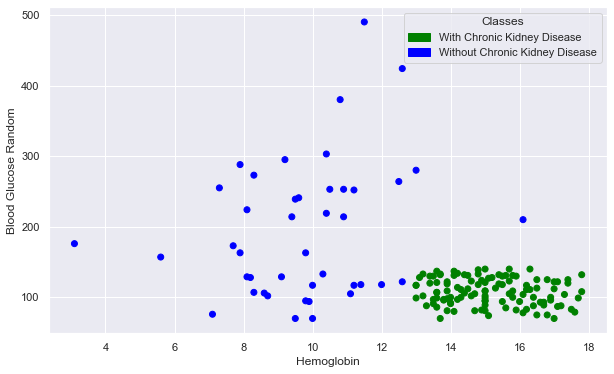

In [80]:
import matplotlib
from matplotlib.patches import Patch
x_feature = kd.Hemoglobin
y_feature = kd["Blood Glucose Random"]
plt.figure(figsize=(10, 6))
colors=["green","blue"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in kd.Class])
plt.xlabel("Hemoglobin")
plt.ylabel("Blood Glucose Random")
class_labels = ['With Chronic Kidney Disease', 'Without Chronic Kidney Disease']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

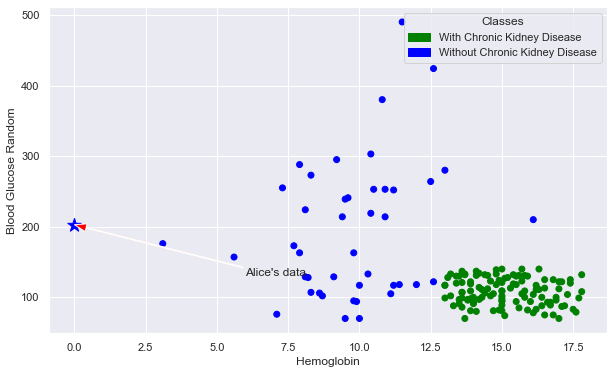

In [81]:
x_feature = kd.Hemoglobin
y_feature = kd["Blood Glucose Random"]
plt.figure(figsize=(10, 6))
colors=["green","blue"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in kd.Class])
new_point = (to_predict_Hemoglobin, to_predict_Glucose_Level)
plt.scatter(new_point[0], new_point[1], c='blue', marker='*', s=200)
plt.annotate("Alice's data", xy=new_point, xytext=(6, 130), arrowprops=dict(facecolor='red', headwidth=8, width=1))
plt.xlabel("Hemoglobin")
plt.ylabel("Blood Glucose Random")
class_labels = ['With Chronic Kidney Disease', 'Without Chronic Kidney Disease']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(kd[["Hemoglobin","Blood Glucose Random"]], kd["Class"], test_size=0.2,random_state=0)

Light blue and Green color data represents the samples chosen for training


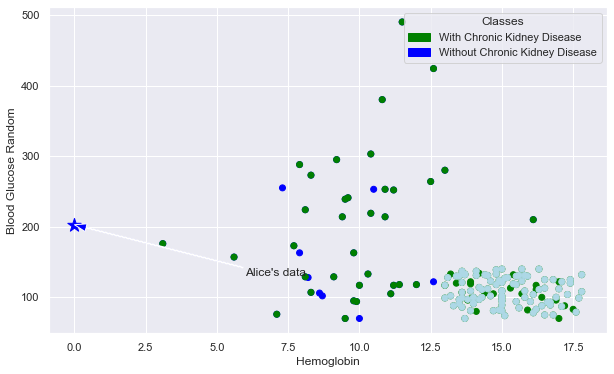

In [83]:
x_feature = kd.Hemoglobin
y_feature = kd["Blood Glucose Random"]
plt.figure(figsize=(10, 6))
colors=["green","blue"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in kd.Class])
new_point = (to_predict_Hemoglobin, to_predict_Glucose_Level)
plt.scatter(new_point[0], new_point[1], c='blue', marker='*', s=200)
plt.annotate("Alice's data", xy=new_point, xytext=(6, 130), arrowprops=dict(facecolor='blue', headwidth=8, width=1))
plt.xlabel("Hemoglobin")
plt.ylabel("Blood Glucose Random")
train_features_x=X_train.Hemoglobin
train_features_y=X_train["Blood Glucose Random"]
colors_train=["lightblue","green"]
plt.scatter(train_features_x,train_features_y, c=[colors_train[label] for label in y_train])
class_labels = ['With Chronic Kidney Disease', 'Without Chronic Kidney Disease']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)
print("Light blue and Green color data represents the samples chosen for training")

In [84]:
#KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)

In [86]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [87]:
predictions=classifier.predict(X_test)

In [88]:
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [89]:
# validation

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [91]:
acc = accuracy_score(y_test, predictions)
print("Accuracy : ",acc) 

Accuracy :  0.90625


In [92]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[23  1]
 [ 2  6]]


In [93]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        24
           1       0.86      0.75      0.80         8

    accuracy                           0.91        32
   macro avg       0.89      0.85      0.87        32
weighted avg       0.90      0.91      0.90        32



In [94]:
# Alice

In [95]:
class_Alice = classifier.predict([[to_predict_Hemoglobin, to_predict_Glucose_Level]])

D:\Application\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [96]:
print("Alice doesn't have CKD")

Alice doesn't have CKD


In [97]:
from sklearn import tree

In [98]:
classifier = tree.DecisionTreeClassifier()

In [99]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[0] <= 12.8\ngini = 0.401\nsamples = 126\nvalue = [91, 35]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.6, 0.5, 'X[1] <= 175.0\ngini = 0.042\nsamples = 93\nvalue = [91, 2]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

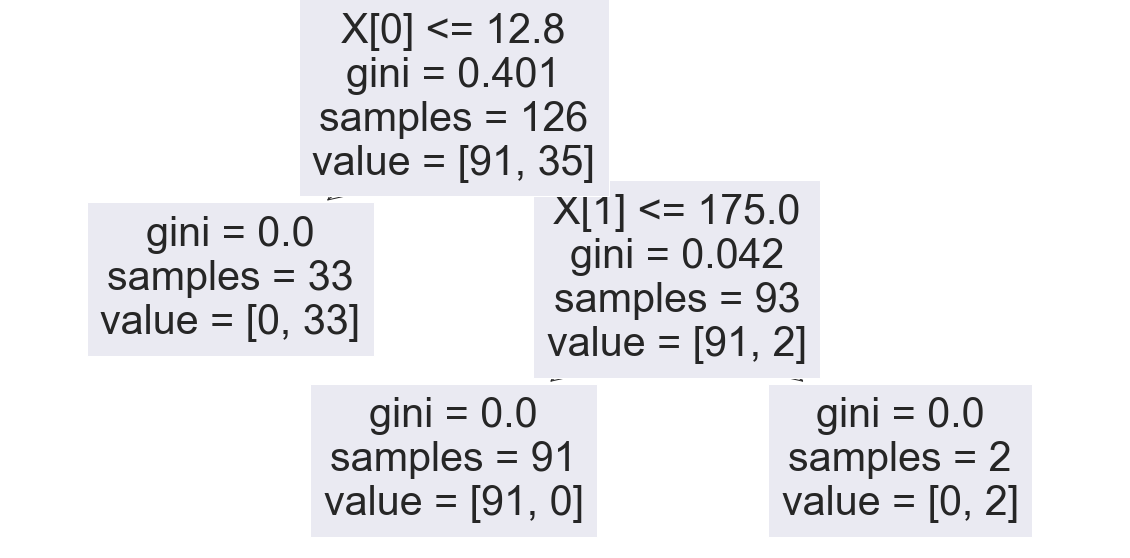

In [100]:
tree.plot_tree(classifier)

In [101]:
predictions=classifier.predict(X_test)

In [102]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[24  0]
 [ 0  8]]


In [103]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         8

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
classifier = LogisticRegression()

In [106]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [107]:
predictions=classifier.predict(X_test)

In [108]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[24  0]
 [ 1  7]]


In [109]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.88      0.93         8

    accuracy                           0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32



### Q5

In [110]:
x = pd.read_csv('wine.csv')

In [111]:
x

Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0       1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1       1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2       1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3       1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4       1    13.24        2.59  2.87  21.0  118     2.80        2.69   
..    ...      ...         ...   ...   ...  ...      ...         ...   
173     3    13.71        5.65  2.45  20.5   95     1.68        0.61   
174     3    13.40        3.91  2.48  23.0  102     1.80        0.75   
175     3    13.27        4.28  2.26  20.0  120     1.59        0.69   
176     3    13.17        2.59  2.37  20.0  120     1.65        0.68   
177     3    14.13        4.10  2.74  24.5   96     2.05        0.76   

     Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                    0.28     2.29       5.64  1.04  3.92     1065  
1                    0.26     1.28       4.38  1.05  3.40     1050  
2                    0.30     2.81       5.68  1.03  3.17     1185  
3                    0.24     2.18       7.80  0.86  3.45     1480  
4                    0.39     1.82       4.32  1.04  2.93      735  
..                    ...      ...        ...   ...   ...      ...  
173                  0.52     1.06       7.70  0.64  1.74      740  
174                  0.43     1.41       7.30  0.70  1.56      750  
175                  0.43     1.35      10.20  0.59  1.56      835  
176                  0.53     1.46       9.30  0.60  1.62      840  
177                  0.56     1.35       9.20  0.61  1.60      560  

[178 rows x 14 columns]

In [112]:
x.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
from sklearn.model_selection import train_test_split
X = x.drop(['Wine'],axis='columns')
y = x['Wine']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=50)

In [115]:
error1= []
error2= []
for k in range(1,10):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

plt.plot(range(1,10),error1,label="train")
plt.plot(range(1,10),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [116]:
knn = KNeighborsClassifier(n_neighbors=1)

In [117]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [118]:
knn.score(X_test, y_test)

0.75

In [119]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  1,  2],
       [ 1, 13,  0],
       [ 1,  4,  4]], dtype=int64)

Text(39.5, 0.5, 'Truth')

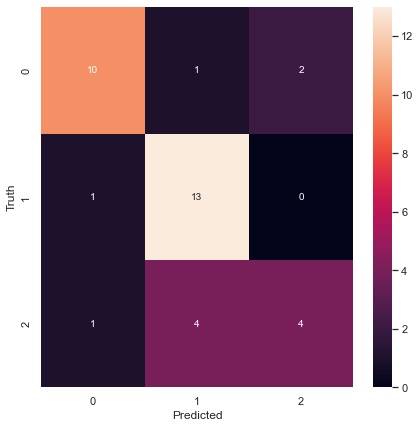

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.77      0.80        13
           2       0.72      0.93      0.81        14
           3       0.67      0.44      0.53         9

    accuracy                           0.75        36
   macro avg       0.74      0.71      0.72        36
weighted avg       0.75      0.75      0.74        36



In [122]:
#other classifier

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rf = RandomForestRegressor(random_state =1, max_features=4)

In [125]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=50)

In [126]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_features=4, random_state=1)

In [127]:
y_pred = rf.predict(X_test)

In [128]:
rf.score(X_test, y_test)

0.9208835051546392

In [129]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  1,  2],
       [ 1, 13,  0],
       [ 1,  4,  4]], dtype=int64)

Text(39.5, 0.5, 'Truth')

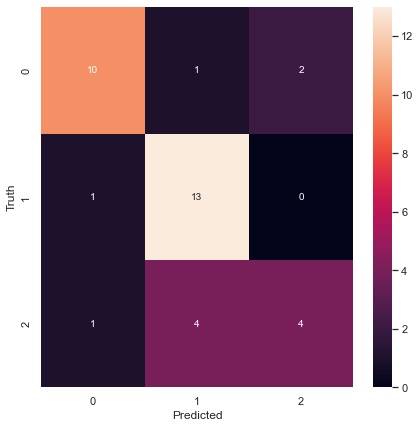

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [131]:
#other classifier

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [133]:
from sklearn.svm import SVC
svm = SVC(C=10000,gamma=0.00001)
svm.fit(X_train,y_train)

SVC(C=10000, gamma=1e-05)

In [134]:
svm.score(X_test, y_test)

0.9322033898305084

### Regression

### Q7

In [135]:
df=pd.read_csv("Housing.csv")

In [136]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.mainroad)
df.mainroad=le.transform(df.mainroad)
le.fit(df.guestroom)
df.guestroom=le.transform(df.guestroom)
le.fit(df.basement)
df.basement=le.transform(df.basement)
le.fit(df.hotwaterheating)
df.hotwaterheating=le.transform(df.hotwaterheating)
le.fit(df.airconditioning)
df.airconditioning=le.transform(df.airconditioning)
le.fit(df.prefarea)
df.prefarea=le.transform(df.prefarea)
le.fit(df.furnishingstatus)
df.furnishingstatus=le.transform(df.furnishingstatus)

In [137]:
corr_matrix = df.corr()
print(corr_matrix["price"])

price               1.000000
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus   -0.304721
Name: price, dtype: float64


In [138]:
print("Area is highly correlated to price compared to others : So we shall use area for visualizations")

Area is highly correlated to price compared to others : So we shall use area for visualizations


In [139]:
x_feature = df.area
y_feature = df.price
plt.figure(figsize=(10, 6))
plt.scatter(x_feature, y_feature,c="blue")
plt.xlabel("Area")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns="area"), df["area"], test_size=0.2,random_state=0)

In [141]:
#KNN

In [142]:
from sklearn.neighbors import KNeighborsRegressor

In [143]:
regressor = KNeighborsRegressor(n_neighbors=3)

In [144]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [145]:
predictions=regressor.predict(X_test)

In [146]:
# Validation

In [147]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [148]:
mse = mean_squared_error(y_test, predictions)
print("Mean squared Error:", mse)

Mean squared Error: 4793420.15188583


In [149]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1641.4220183486236


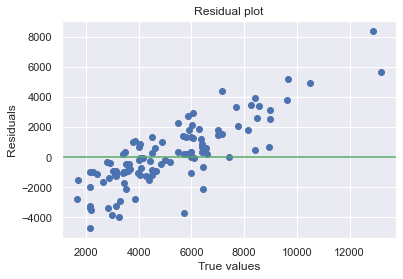

In [150]:
residuals = y_test - predictions
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='g')
plt.xlabel("True values")
plt.ylabel("Residuals")
plt.title("Residual plot")
plt.show()

In [151]:
#Residuals are randomly distributed around the horizontal axis, 
#it suggests that the model is a decent fit for the data. "Decent" not "good" because the mse and mae are quite high

### Q8

In [152]:
df_train=pd.read_csv("train.csv")

In [153]:
df_test=pd.read_csv("test.csv")

In [154]:
df_train.dropna(inplace=True)

In [155]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [156]:
df_train.drop(columns=["Name","PassengerId"],inplace=True)

In [157]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train.Embarked)
df_train.Embarked=le.transform(df_train.Embarked)
le.fit(df_train.Cabin)
df_train.Cabin=le.transform(df_train.Cabin)
le.fit(df_train.Ticket)
df_train.Ticket=le.transform(df_train.Ticket)
le.fit(df_train.Sex)
df_train.Sex=le.transform(df_train.Sex)

In [158]:
corr_matrix = df_train.corr()
print(corr_matrix["Survived"])

Survived    1.000000
Pclass     -0.034542
Sex        -0.532418
Age        -0.254085
SibSp       0.106346
Parch       0.023582
Ticket      0.022768
Fare        0.134241
Cabin      -0.010664
Embarked   -0.100943
Name: Survived, dtype: float64


In [159]:
print("Area is highly correlated to Fare,SibSp compared to others : So we shall use area for visualizations")

Area is highly correlated to Fare,SibSp compared to others : So we shall use area for visualizations


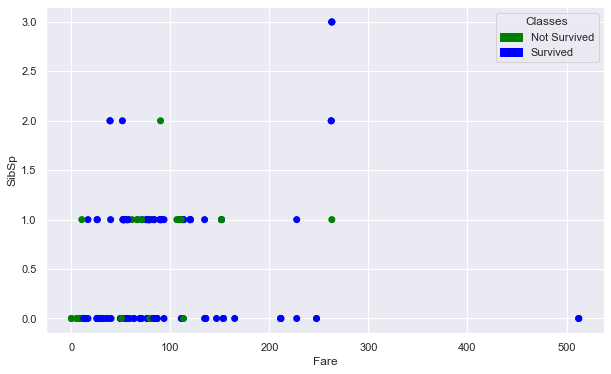

In [160]:
x_feature = df_train.Fare
y_feature = df_train.SibSp
plt.figure(figsize=(10, 6))
colors=["green","blue"]
plt.scatter(x_feature, y_feature, c=[colors[label] for label in df_train.Survived])
plt.xlabel("Fare")
plt.ylabel("SibSp")
class_labels = ['Not Survived', 'Survived']
patches = [Patch(color=color, label=label) for color, label in zip(colors, class_labels)]
plt.legend(title='Classes', handles=patches)

In [161]:
df_test.dropna(inplace=True)

In [162]:
df_test.drop(columns=["Name","PassengerId"],inplace=True)

In [163]:
le = preprocessing.LabelEncoder()
le.fit(df_test.Embarked)
df_test.Embarked=le.transform(df_test.Embarked)
le.fit(df_test.Cabin)
df_test.Cabin=le.transform(df_test.Cabin)
le.fit(df_test.Ticket)
df_test.Ticket=le.transform(df_test.Ticket)
le.fit(df_test.Sex)
df_test.Sex=le.transform(df_test.Sex)

In [164]:
X=df_train.drop(columns="Survived")

In [165]:
Y=df_train.Survived

In [166]:
# Logistic Regression

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
classifier = LogisticRegression()

In [169]:
classifier.fit(X,Y)

D:\Application\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
#Train-test split within df_train to carry out validations

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=0)

In [172]:
classifier = LogisticRegression()

In [173]:
classifier.fit(X_train,y_train)

D:\Application\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [174]:
predictions=classifier.predict(X_test)

In [175]:
confusion_matrix_ = confusion_matrix(y_test, predictions)
print("Confusion Matrix : ")
print(confusion_matrix_)

Confusion Matrix : 
[[ 4  3]
 [ 4 26]]


In [176]:
report = classification_report(y_test, predictions)
print("Overall Report")
print(report)

Overall Report
              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.90      0.87      0.88        30

    accuracy                           0.81        37
   macro avg       0.70      0.72      0.71        37
weighted avg       0.82      0.81      0.82        37

